In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Dataset_Tomat/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    'Dataset_Tomat/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [3]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=25,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size
)


Epoch 1/25


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 116s 361ms/step - accuracy: 0.2359 - loss: 2.0640 - val_accuracy: 0.4808 - val_loss: 1.4704
Epoch 2/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.6250 - loss: 1.3755 - val_accuracy: 0.6250 - val_loss: 0.9633
Epoch 3/25


C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


312/312 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.5707 - loss: 1.2429 - val_accuracy: 0.6754 - val_loss: 0.9198
Epoch 4/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.5312 - loss: 1.4896 - val_accuracy: 0.6250 - val_loss: 0.8066
Epoch 5/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.6954 - loss: 0.8859 - val_accuracy: 0.6794 - val_loss: 0.9705
Epoch 6/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.8125 - loss: 0.6991 - val_accuracy: 0.6250 - val_loss: 0.9533
Epoch 7/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step - accuracy: 0.7432 - loss: 0.7395 - val_accuracy: 0.7550 - val_loss: 0.7137
Epoch 8/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.8125 - loss: 0.4758 - val_accuracy: 0.6250 - val_loss: 1.0413
Epoch 9/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.7648 - loss: 0.6686 - val_accuracy: 0.8034 - val_loss: 0.5864
Epoch 10/25
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 66us/step - accuracy: 0.6875 - loss: 0.8276 - val_accuracy: 

In [5]:
loss, accuracy = model.evaluate(test_set)
print(f'Test accuracy: {accuracy*100:.2f}%')


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8736 - loss: 0.3774
Test accuracy: 86.10%


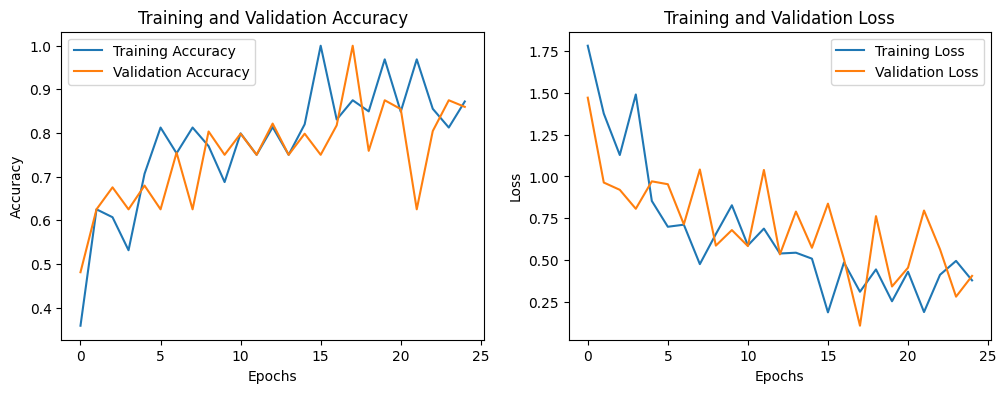

In [6]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
